In [2]:
#Lets import some stuff!
from datetime import datetime
import os

import cartopy
import matplotlib.pyplot as plt
from netCDF4 import num2date
import numpy as np
import pyart
import netCDF4
import xarray
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cmac import cmac, quicklooks
import copy
import importlib
import pytz

%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-11-27 13:48:11.784830. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [20]:
def plot_radar_ppi(radar, field='reflectivity', cmap=None,
                   vmin=None, vmax=None, sweep=None, fig=None, name=None):
    if sweep is None:
        sweep = 0

    if name is None:
        name = 'KAMX'

    # Lets get some geographical context
    lats = radar.gate_latitude
    lons = radar.gate_longitude

    min_lon = lons['data'].min()
    min_lat = lats['data'].min()
    max_lat = lats['data'].max()
    max_lon = lons['data'].max()

    print('min_lat:', min_lat, ' min_lon:', min_lon,
          ' max_lat:', max_lat, ' max_lon:', max_lon)

    index_at_start = radar.sweep_start_ray_index['data'][sweep]
    time_at_start_of_radar = netCDF4.num2date(radar.time['data'][index_at_start],
                                              radar.time['units'])
    GMT = pytz.timezone('Australia/Darwin')
    local_time = GMT.fromutc(time_at_start_of_radar)
    fancy_date_string = local_time.strftime('%A %B %d at %I:%M %p %Z')
    print(fancy_date_string)
    if fig is None:
        fig = plt.figure(figsize=[15, 10])
    display = pyart.graph.RadarMapDisplayCartopy(radar)
    lat_0 = display.loc[0]
    lon_0 = display.loc[1]

    # Main difference! Cartopy forces you to select a projection first!
    projection = cartopy.crs.Mercator(
        central_longitude=lon_0,
        min_latitude=min_lat, max_latitude=max_lat)

    title = name + ' ' + field.replace('_', ' ') + ' \n' + fancy_date_string

    display.plot_ppi_map(
        field, sweep, colorbar_flag=False,
        title=title,
        projection=projection,
        min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
        vmin=vmin, vmax=vmax, cmap=cmap, resolution='50m')
    
    ax1=plt.gca()
    extent = [min_lon, max_lon, min_lat, max_lat]
    ax1.set_extent(extent)

    lb = display._get_colorbar_label(field)
    cb = plt.colorbar(display.plots[0], shrink=.7, aspect=30, pad=0.01)
    cb.set_label(lb)
    # Mark the radar
    display.plot_point(lon_0, lat_0, label_text=name)

    # Plot some lat and lon lines
    gl = display.ax.gridlines(draw_labels=True,
                              linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    request = cimgt.GoogleTiles(style='satellite')
    ax1.add_image(request, 7, zorder=0)


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-11-27 19:49:01.953942. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [8]:
fname = '/Users/scollis/Downloads/nc_20171026_0742_pTypeClassification.nc'
rfname = '/Users/scollis/Downloads/071059.mdv'
radar = pyart.io.read(rfname)
dset = netCDF4.Dataset(fname)

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-11-27 19:44:01.463730. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-11-27 13:50:18.857823. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [16]:
print(dset.variables.keys())
print(radar.fields.keys())

odict_keys(['bin', 'ray', 'scan', 'index'])
dict_keys(['differential_reflectivity', 'reflectivity', 'spectrum_width', 'differential_phase', 'normalized_coherent_power', 'specific_differential_phase', 'velocity', 'cross_correlation_ratio'])


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-11-27 19:48:15.903163. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


min_lat: -28.948545896  min_lon: 151.417895104  max_lat: -26.3893905054  max_lon: 154.307507728
Thursday November 27 at 04:36 PM ACST


/Users/scollis/anaconda/envs/houston/lib/python3.5/site-packages/cartopy/img_transform.py:80: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  endpoint=False)


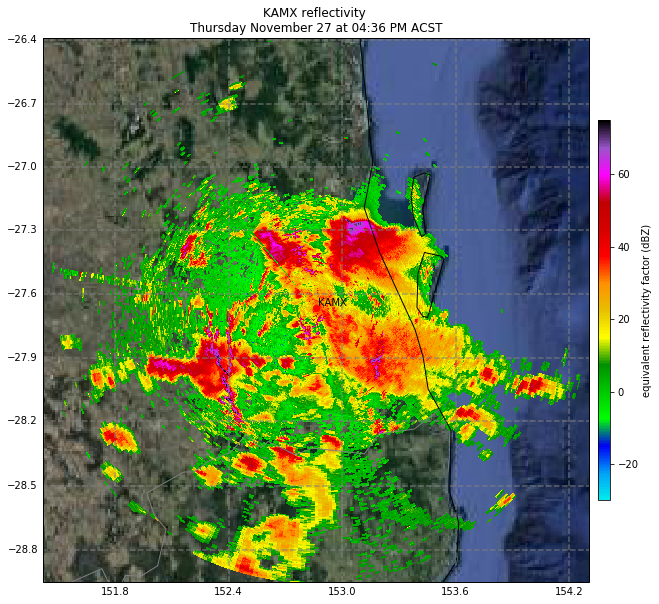

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-11-27 19:49:03.606337. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [21]:
plot_radar_ppi(radar, field='reflectivity', cmap=None,
                   vmin=None, vmax=None, sweep=None, fig=None, name=None)

In [25]:
print(radar.fields['reflectivity']['data'].shape)
print(radar.nsweeps)
print(dset.variables['index'].shape)

(3240, 950)
9
(14, 360, 1200)


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-11-27 19:50:40.545807. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [28]:
dset.dimensions

OrderedDict([('bin',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'bin', size = 1200),
             ('ray',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'ray', size = 360),
             ('scan',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'scan', size = 14)])

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-11-27 19:53:02.403419. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [31]:
foo = dset.variables['index'][:]
first_sweep = foo[0,:,:]

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-11-27 19:56:31.344387. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [34]:
idx = copy.deepcopy(radar.fields['reflectivity'])
idx['data'] = idx['data']*0.0
idx['data'][0:360,:] = first_sweep[:, 0:950]
idx['standard_name'] = 'index'
idx['units'] = 'ID'
radar.add_field('idx', idx)

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-11-27 19:57:43.899504. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


min_lat: -28.948545896  min_lon: 151.417895104  max_lat: -26.3893905054  max_lon: 154.307507728
Thursday November 27 at 04:36 PM ACST


/Users/scollis/anaconda/envs/houston/lib/python3.5/site-packages/cartopy/img_transform.py:80: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  endpoint=False)
/Users/scollis/anaconda/envs/houston/lib/python3.5/site-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


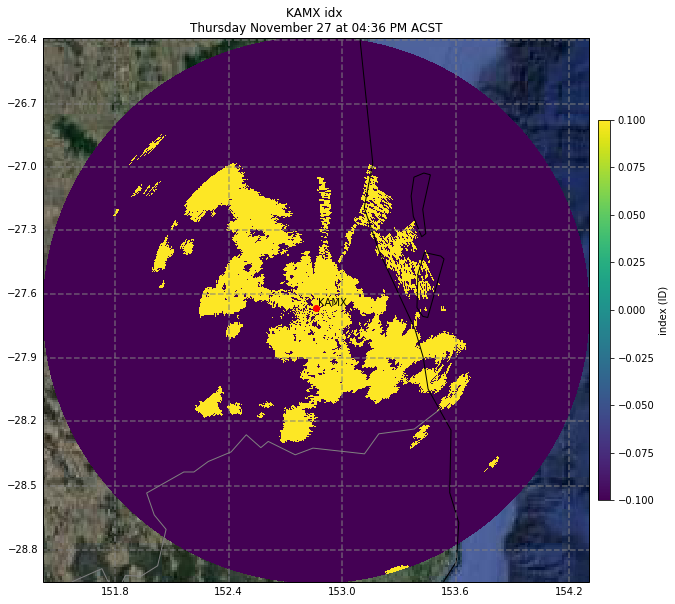

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-11-27 19:57:48.984094. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [35]:
plot_radar_ppi(radar, field='idx', cmap=None,
                   vmin=None, vmax=None, sweep=None, fig=None, name=None)